In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from tqdm.auto import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghckd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ghckd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ghckd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [85]:
train = pd.read_csv(
    filepath_or_buffer="../data/train.csv", 
    )

def text_cleaner(text:str):
    if text is not np.nan:
        text = text.lower()
        text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
        stop = stopwords.words("english")
        text = " ".join([word for word in text.split() if word not in (stop)])
    return text

def keyword_splitter(x:str):
    if "%20" in x:
        x = tuple(x.split("%20"))
    else:
        x = (x)
    return x

for col in ["location", "text"]:
    train[col] = train[col].apply(text_cleaner)    
    
train["keyword"] = train["keyword"].fillna("")
train["keyword_split"] = train["keyword"].apply(keyword_splitter)

train["location"] = train["location"].fillna("")
train["text"] = train["text"].fillna("")

In [87]:
train

,id,keyword,location,text,target,keyword_split
0,1,,,deeds reason earthquake may allah forgive us,1,
1,4,,,forest fire near la ronge sask canada,1,
2,5,,,residents asked shelter place notified officer...,1,
3,6,,,13000 people receive wildfires evacuation orde...,1,
4,7,,,got sent photo ruby alaska smoke wildfires pou...,1,
...,...,...,...,...,...,...
7608,10869,,,two giant cranes holding bridge collapse nearb...,1,
7609,10870,,,ariaahrary thetawniest control wild fires cali...,1,
7610,10871,,,m194 0104 utc5km volcano hawaii,1,
7611,10872,,,police investigating ebike collided car little...,1,


In [33]:
# ## Stemming and Lemmatization
# stemmer = PorterStemmer()
# stemmer.stem(single_text)

# lemmatizer = WordNetLemmatizer()
# lemmatizer.lemmatize(single_text)



In [3]:
## tokenize
def tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [78]:
train["text_tokenized"] = train["text"].apply(tokenizer)

In [79]:
from afinn import Afinn
afinn = Afinn()
train["sentiment_score"] = train["text"].apply(afinn.score)
train

,id,keyword,location,text,target,keyword_split,text_tokenized,sentiment_score
0,1,,,deeds reason earthquake may allah forgive us,1,,"[deeds, reason, earthquake, may, allah, forgiv...",1.0
1,4,,,forest fire near la ronge sask canada,1,,"[forest, fire, near, la, ronge, sask, canada]",-2.0
2,5,,,residents asked shelter place notified officer...,1,,"[residents, asked, shelter, place, notified, o...",-1.0
3,6,,,13000 people receive wildfires evacuation orde...,1,,"[13000, people, receive, wildfires, evacuation...",-1.0
4,7,,,got sent photo ruby alaska smoke wildfires pou...,1,,"[got, sent, photo, ruby, alaska, smoke, wildfi...",0.0
...,...,...,...,...,...,...,...,...
7608,10869,,,two giant cranes holding bridge collapse nearb...,1,,"[two, giant, cranes, holding, bridge, collapse...",-2.0
7609,10870,,,ariaahrary thetawniest control wild fires cali...,1,,"[ariaahrary, thetawniest, control, wild, fires...",-2.0
7610,10871,,,m194 0104 utc5km volcano hawaii,1,,"[m194, 0104, utc5km, volcano, hawaii]",0.0
7611,10872,,,police investigating ebike collided car little...,1,,"[police, investigating, ebike, collided, car, ...",-6.0


<Axes: xlabel='sentiment_score', ylabel='Density'>

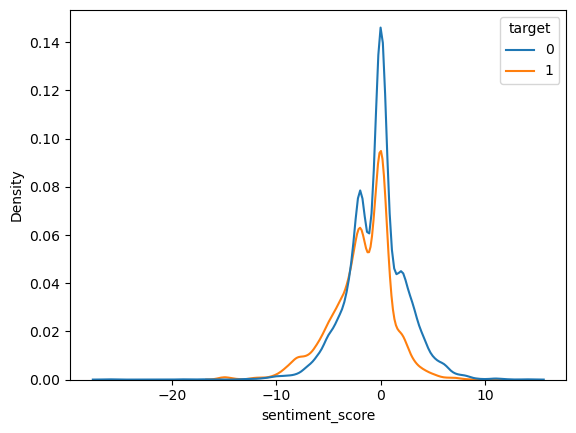

In [80]:
import seaborn as sns
sns.kdeplot(data=train, x="sentiment_score", hue="target")


In [8]:
train["keyword"].unique()

array(['no keyword', 'ablaze', 'accident', 'aftershock',
       'airplane20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown20up', 'body20bag', 'body20bagging',
       'body20bags', 'bomb', 'bombed', 'bombing', 'bridge20collapse',
       'buildings20burning', 'buildings20on20fire', 'burned', 'burning',
       'burning20buildings', 'bush20fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical20emergency',
       'cliff20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed